<a href="https://colab.research.google.com/github/dedeczech/Borovicka/blob/main/Tramvaje_linky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

S pomocí generativního AI chatbotu ([Claude](https://claude.ai/new)), [GitHub Copilot](https://github.com/copilot), ChatGPT, [Gemini](https://gemini.google.com/app) ) vytvořte seznam s vnořeným seznamem, řetězcem nebo tuple, např.
seznam tramvají z Prahy ve formátu:
(typ, maximální_rychlost_km_h, rok_první_výroby) a databázi smysluplným způsobem zpracujte:

filtrování seznamu,
řazení podle různých atributů,
výpočet popisných statistik,
grafická reprezentace - histogram.

Inspirace pro tvorbu datasetu:

*   největší města světa (název, počet obyvatel, kontinent)
*   státy (název, rozloha, počet obyvatel, hlavní město)
*   pražské tramvajové tratě (číslo linky, délka tratě, rok vzniku)
*   evropské řeky (název, délka, země, do které ústí)
*   filmové databáze (název filmu, rok vydání, hodnocení)
*   sporty (název, počet hráčů, olympijský/neolympijský)

Linky s využitím nad 80 %: [(9, 'Sídliště Řepy – Spojovací', 95), (17, 'Sídliště Modřany – Vozovna Kobylisy', 85), (22, 'Bílá Hora – Nádraží Hostivař', 90)]

Seřazeno podle využití:
(9, 'Sídliště Řepy – Spojovací', 95)
(22, 'Bílá Hora – Nádraží Hostivař', 90)
(17, 'Sídliště Modřany – Vozovna Kobylisy', 85)
(10, 'Sídliště Řepy – Sídliště Ďáblice', 80)
(26, 'Divoká Šárka – Nádraží Hostivař', 80)
(20, 'Divoká Šárka – Sídliště Barrandov', 78)
(7, 'Radlická – Lehovec', 75)
(14, 'Sídliště Barrandov – Nádraží Vysočany', 75)
(12, 'Sídliště Barrandov – Sídliště Ďáblice', 72)
(3, 'Kobylisy – Sídliště Modřany', 70)
(18, 'Vozovna Pankrác – Nádraží Podbaba', 70)
(8, 'Nádraží Podbaba – Lehovec', 68)
(4, 'Sídliště Barrandov – Kubánské náměstí', 65)
(19, 'Pankrác – Lehovec', 65)
(25, 'Lehovec – Vozovna Kobylisy', 65)
(16, 'Kotlářka – Vozovna Kobylisy', 62)
(1, 'Sídliště Petřiny – Spojovací', 60)
(15, 'Kotlářka – Lehovec', 60)
(24, 'Kobylisy – Kubánské náměstí', 58)
(2, 'Sídliště Petřiny – Nádraží Bran

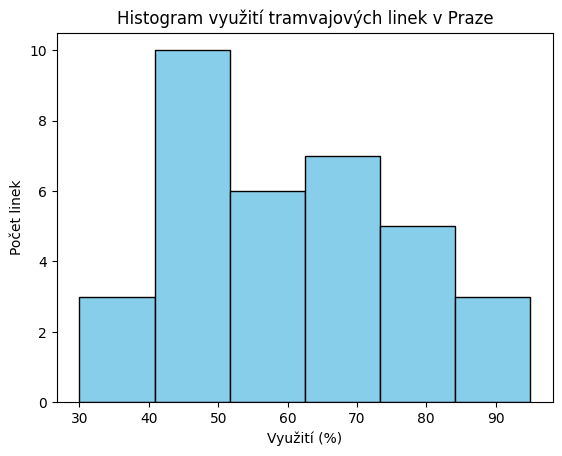

In [3]:
# -*- coding: utf-8 -*-
import statistics
import matplotlib.pyplot as plt

# Kompletní seznam tramvajových linek v Praze
# Formát: (číslo linky, trasa, využití % – orientační)
tram_lines = [
    (1, "Sídliště Petřiny – Spojovací", 60),
    (2, "Sídliště Petřiny – Nádraží Braník", 55),
    (3, "Kobylisy – Sídliště Modřany", 70),
    (4, "Sídliště Barrandov – Kubánské náměstí", 65),
    (5, "Sídliště Barrandov – Ústřední dílny DP", 50),
    (6, "Kubánské náměstí – Nádraží Holešovice", 45),
    (7, "Radlická – Lehovec", 75),
    (8, "Nádraží Podbaba – Lehovec", 68),
    (9, "Sídliště Řepy – Spojovací", 95),
    (10, "Sídliště Řepy – Sídliště Ďáblice", 80),
    (11, "Spořilov – Olšanské hřbitovy", 50),
    (12, "Sídliště Barrandov – Sídliště Ďáblice", 72),
    (13, "Čechovo náměstí – Olšanské hřbitovy", 40),
    (14, "Sídliště Barrandov – Nádraží Vysočany", 75),
    (15, "Kotlářka – Lehovec", 60),
    (16, "Kotlářka – Vozovna Kobylisy", 62),
    (17, "Sídliště Modřany – Vozovna Kobylisy", 85),
    (18, "Vozovna Pankrác – Nádraží Podbaba", 70),
    (19, "Pankrác – Lehovec", 65),
    (20, "Divoká Šárka – Sídliště Barrandov", 78),
    (21, "Modřany – Čechovo náměstí", 55),
    (22, "Bílá Hora – Nádraží Hostivař", 90),
    (23, "Královka – Zvonařka (historická)", 30),
    (24, "Kobylisy – Kubánské náměstí", 58),
    (25, "Lehovec – Vozovna Kobylisy", 65),
    (26, "Divoká Šárka – Nádraží Hostivař", 80),

    # Noční linky (91–99)
    (91, "Divoká Šárka – Sídliště Řepy", 40),
    (92, "Sídliště Modřany – Lehovec", 45),
    (93, "Sídliště Řepy – Sídliště Modřany", 50),
    (94, "Sídliště Barrandov – Lehovec", 48),
    (95, "Vozovna Pankrác – Sídliště Petřiny", 42),
    (96, "Sídliště Ďáblice – Sídliště Modřany", 47),
    (97, "Bílá Hora – Vozovna Kobylisy", 44),
    (99, "Sídliště Ďáblice – Sídliště Řepy", 46)
]

# --- Filtrování ---
filtered = [line for line in tram_lines if line[2] > 80]
print("Linky s využitím nad 80 %:", filtered)

# --- Řazení podle využití (sestupně) ---
sorted_by_usage = sorted(tram_lines, key=lambda x: x[2], reverse=True)
print("\nSeřazeno podle využití:")
for line in sorted_by_usage:
    print(line)

# --- Popisné statistiky ---
usage_values = [line[2] for line in tram_lines]
mean_usage = statistics.mean(usage_values)
median_usage = statistics.median(usage_values)
min_usage = min(usage_values)
max_usage = max(usage_values)

print("\nPopisné statistiky:")
print("Průměr:", mean_usage)
print("Medián:", median_usage)
print("Minimum:", min_usage)
print("Maximum:", max_usage)

# --- Histogram ---
plt.hist(usage_values, bins=6, color='skyblue', edgecolor='black')
plt.title("Histogram využití tramvajových linek v Praze")
plt.xlabel("Využití (%)")
plt.ylabel("Počet linek")
plt.show()
